In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import sys
import matplotlib.pyplot as plt
from sklearn import datasets
import tensorflow as tf
from sklearn import utils
from sklearn.model_selection import train_test_split
from keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.applications import *
from tensorflow.keras.preprocessing import *
from tensorflow.keras.callbacks import EarlyStopping

print(tf.__version__)


from google.colab import drive
drive.mount('/content/drive')

os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/IA2_PROYECTOFINAL/binarios'
%cd '/content/drive/MyDrive/IA2_PROYECTOFINAL/Dataset/binarios'

2.11.0
Mounted at /content/drive
[Errno 2] No such file or directory: '/content/drive/MyDrive/IA2_PROYECTOFINAL/Dataset/binarios'
/content


In [ ]:
X_train= np.load("/content/drive/MyDrive/IA2_PROYECTOFINAL/Dataset/Binarios/x_train.npy")
X_test= np.load("/content/drive/MyDrive/IA2_PROYECTOFINAL/Dataset/Binarios/x_test.npy")
y_train= np.load("/content/drive/MyDrive/IA2_PROYECTOFINAL/Dataset/Binarios/y_train.npy")
y_test= np.load("/content/drive/MyDrive/IA2_PROYECTOFINAL/Dataset/Binarios/y_test.npy")
print(np.shape(X_train),np.shape(X_test),np.shape(y_train),np.shape(y_test))

(20710, 32, 32, 3) (8876, 32, 32, 3) (20710, 2) (8876, 2)


# Segunda arquitectura: CNN

Req minimos

-CNN con scratch dropout batch normalization
-Transfer learning justificada, si son muchos datos, si son poquitos, qué descongelamos.

-TL(EJ de justificación: densenet porque concatena y no sube...) +Aumentation+Callbacks

In [ ]:
#primer red
model_CNN1 =  tf.keras.applications.MobileNetV3Small(input_shape=(32,32,3), weights='imagenet', include_top=False)

print("Total layers of Mobilenet: ", len(model_CNN1.layers))

model_CNN1.trainable = False #congelado todo
print("Total layers of Mobilenet: ", len(model_CNN1.layers))
for layer in model_CNN1.layers[-50:]: 
  layer.trainable =  True #Descongelando las ultimas 50
print("Total layers of Mobilenet: ", len(model_CNN1.layers))


4334752/4334752 [==============================] - 0s 0us/step
Total layers of Mobilenet:  229
Total layers of Mobilenet:  229
Total layers of Mobilenet:  229


In [ ]:


c1 =tf.keras.layers.Dense(32, activation='relu')
c4 =tf.keras.layers.Dense(64, activation='relu')
c8 =tf.keras.layers.Dense(512, activation='relu')
c9 =tf.keras.layers.Dropout(0.5)
c10 =tf.keras.layers.Dense(2, activation='softmax')
global_average_layer = tf.keras.layers.GlobalAveragePooling2D() # To mobilenet cnns


model_CNN_1= tf.keras.Sequential([
  model_CNN1,
  global_average_layer,
  c1,
  c4,
  c8,
  c9,
  c10
  
  
  
])

In [ ]:

learning_rate= 0.001
opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model_CNN_1.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
#modelT2.compile(optimizer=opt,loss='binary_crossentropy', metrics=['accuracy'])

#early_stopping = EarlyStopping(patience=30, restore_best_weights = True)
#history2 = modelT2.fit(X_trainf, y_train, epochs=10,verbose=1, batch_size=64,validation_data=(X_testf, y_test))
history1 = model_CNN_1.fit(X_train, y_train, epochs=50,verbose=1, batch_size=64,validation_data=(X_test, y_test), callbacks=[EarlyStopping(patience=50, restore_best_weights = True)])




Epoch 1/50
324/324 [==============================] - 27s 41ms/step - loss: 0.2794 - accuracy: 0.9065 - val_loss: 0.3658 - val_accuracy: 0.9042
Epoch 2/50
324/324 [==============================] - 4s 13ms/step - loss: 0.2564 - accuracy: 0.9098 - val_loss: 0.3242 - val_accuracy: 0.9042
Epoch 3/50
324/324 [==============================] - 6s 19ms/step - loss: 0.2505 - accuracy: 0.9101 - val_loss: 0.3118 - val_accuracy: 0.9042
Epoch 4/50
324/324 [==============================] - 4s 12ms/step - loss: 0.2461 - accuracy: 0.9104 - val_loss: 0.3154 - val_accuracy: 0.9042
Epoch 5/50
324/324 [==============================] - 4s 13ms/step - loss: 0.2446 - accuracy: 0.9103 - val_loss: 0.3567 - val_accuracy: 0.9042
Epoch 6/50
324/324 [==============================] - 6s 17ms/step - loss: 0.2412 - accuracy: 0.9106 - val_loss: 0.3963 - val_accuracy: 0.9042
Epoch 7/50
324/324 [==============================] - 4s 12ms/step - loss: 0.2420 - accuracy: 0.9103 - val_loss: 0.3601 - val_accuracy: 0.904

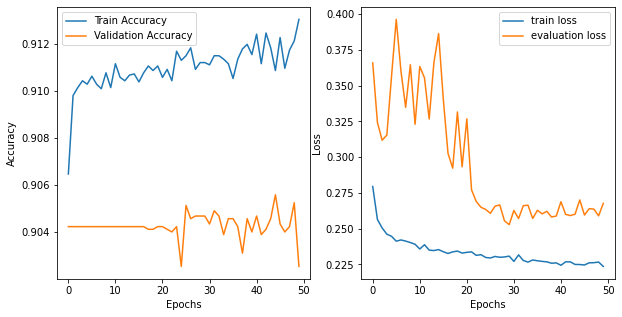

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history1.history['accuracy'], label='Train Accuracy');
ax.plot(history1.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history1.history['loss'], label='train loss');
ax.plot(history1.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class_names = ['airplane','automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]    
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img.reshape(32, 32,3), cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

ERROR:root:File `'code/dl_plot.py'` not found.


/content/drive/MyDrive/IA2_PROYECTOFINAL/Dataset/Binarios
278/278 [==============================] - 3s 8ms/step
valor predicho: 1  clase:  SR
max prob:  0.98587406 ground truth:  SR
(8876, 2)


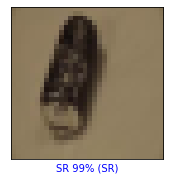

In [ ]:
#@title **code:**  Evaluate results
%cd '/content/drive/MyDrive/IA2_PROYECTOFINAL/Dataset/Binarios'

import matplotlib.pyplot as plt
class_names = ['NR','SR']
%run code/dl_plot.py
index_vector =  18#@param {type:"integer"}

predictionss = model_CNN_1.predict(X_test)
print ("valor predicho:",  np.argmax(predictionss[index_vector]), " clase: ", class_names[np.argmax(predictionss[index_vector])])
print ("max prob: ", np.max(predictionss[index_vector]), "ground truth: ", class_names[np.argmax(y_test ,axis=1)[index_vector]])

print(predictionss.shape)
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(index_vector, predictionss, np.argmax(y_test ,axis=1), X_test)



ERROR:root:File `'code/dl_plot.py'` not found.


278/278 [==============================] - 2s 7ms/step
valor predicho: 1  clase:  SR
max prob:  0.7790386 ground truth:  NR
(8876, 2)


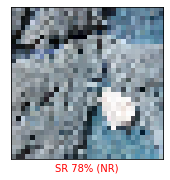

In [ ]:
#@title **code:**  Evaluate results

import matplotlib.pyplot as plt
class_names = ['NR','SR']
%run code/dl_plot.py
index_vector =  36#@param {type:"integer"}

predictionss = model_CNN_1.predict(X_test)
print ("valor predicho:",  np.argmax(predictionss[index_vector]), " clase: ", class_names[np.argmax(predictionss[index_vector])])
print ("max prob: ", np.max(predictionss[index_vector]), "ground truth: ", class_names[np.argmax(y_test ,axis=1)[index_vector]])

print(predictionss.shape)
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(index_vector, predictionss, np.argmax(y_test ,axis=1), X_test)
#plt.subplot(1,2,2)
#plot_value_array(index_vector, predictions,  np.argmax(Y_test ,axis=1))